### 컨볼루션 층 테스트

In [1]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.layers import Convolution

image = np.arange(16).reshape(1,1,4,4)
print(image.shape)
print(image)

W = np.ones((1,1,2,2))
print(W)
b = np.full((1,), 3)
print(b.shape)
print(b)
conv = Convolution(W, b)
out = conv.forward(image)
print(out.shape)
print(out)

(1, 1, 4, 4)
[[[[ 0  1  2  3]
   [ 4  5  6  7]
   [ 8  9 10 11]
   [12 13 14 15]]]]
[[[[1. 1.]
   [1. 1.]]]]
(1,)
[3]
(1, 1, 3, 3)
[[[[13. 17. 21.]
   [29. 33. 37.]
   [45. 49. 53.]]]]


### 다차원 배열의 연산

In [ ]:
import numpy as np
a = np.arange(12).reshape(2,2,3)
print(a.shape)
print(a)

In [ ]:
a = np.arange(12).reshape(2,2,3)
b = a.transpose(2, 1, 0)
print(b.shape)
print(b)

In [ ]:
a = np.arange(12).reshape(2,2,3)
b = a.transpose(1, 0, 2)
print(b.shape) # (2,2,3)
print(b)

In [ ]:
a = np.arange(12).reshape(2,2,3)
b = a.transpose(0, 2, 1)
print(b.shape) # (2,3,2)
print(b)

In [ ]:
a = np.arange(12).reshape(2,2,3)
b = a.transpose(2, 0, 1)
print(b.shape) 
print(b)

### im2col 함수 테스트

In [11]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.util import im2col

# x1 = np.arange(9).reshape(1, 1, 3, 3)  # OH = (H - FH + 1) , OW = (W - FW + 1) 
# col1 = im2col(x1, 2, 2)
# print(col1.shape)
# print(col1)

# x2 = np.arange(18).reshape(1, 2, 3, 3)
# col2 = im2col(x2, 2, 2)
# print(col2.shape)
# print(col2)

# x3 = np.arange(36).reshape(2, 2, 3, 3)
# col3 = im2col(x3, 2, 2)
# print(col3.shape)
# print(col3)

# x4 = np.arange(49).reshape(1, 1, 7, 7)
# col4 = im2col(x4, 5, 5)
# print(col4.shape)   # ( OH*OW, FH*FW)

x5 = np.arange(3*2*7*7).reshape(3, 2, 7, 7)
col5 = im2col(x5, 5, 5)
print(col5.shape)   # ( N*OH*OW, C*FH*FW)

(27, 50)


### np.pad() 의 동작

In [16]:
import numpy as np
pad=0
input_data = np.arange(9).reshape((1,1,3,3))
print(input_data)
img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
print(img)

[[[[0 1 2]
   [3 4 5]
   [6 7 8]]]]
[[[[0 1 2]
   [3 4 5]
   [6 7 8]]]]


### 파이썬의 슬라이스 문법

In [ ]:
a = np.array([1,2,3])
print(a[0])
print(a[0:1])

In [ ]:
a = np.array([[1,2],[3,4]])
print(a[0])   # [1 2]
print(a[0:1]) # [[1 2]]

In [ ]:
a = np.arange(9).reshape(1,1,3,3)
print(a.shape)  # (1, 1, 3, 3)
a = a[:, :, 0:2:1, 0:2:1]
print(a.shape) #  (1, 1, 2, 2)

In [ ]:
a = np.zeros(16).reshape(1,1,2,2,2,2)
print(a.shape)  # (1, 1, 2, 2, 2, 2)
a = a[:, :, 0, 0, :, :]
print(a.shape)

In [ ]:
image = np.arange(9).reshape(1,1,3,3)
col = np.zeros(16).reshape(1,1,2,2,2,2)

col[:, :, 0, 0, :, :] = image[:, :, 0:2:1, 0:2:1]
print(col) 

### input 채널이 1개인 경우

In [16]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
pad=0
stride=1
filter_h = 2
filter_w = 2
input_data = np.arange(16).reshape(1,1,4,4)
# print(input_data.shape)
# print(input_data)

N, C, H, W = input_data.shape
out_h = (H + 2*pad - filter_h)//stride + 1
out_w = (W + 2*pad - filter_w)//stride + 1

img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
# col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

# print(img.shape)
# print(img)
# print(col.shape)

# for y in range(filter_h):
#     y_max = y + stride*out_h
#     for x in range(filter_w):
#         x_max = x + stride*out_w
#         col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

# print(col)    # (1,1,2,2,3,3)            

col = np.zeros((N, C, out_h, out_w, filter_h, filter_w))
for y in range(out_h):
    y_max = y + stride*filter_h
    for x in range(out_w):
        x_max = x + stride*filter_w
        col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

print(col)    # (1,1,3,3,2,2)            
    
# col[:, :, 0, 0, :, :] = img[:, :, 0:3:1, 0:3:1]
# col[:, :, 0, 1, :, :] = img[:, :, 0:3:1, 1:4:1]
# col[:, :, 1, 0, :, :] = img[:, :, 1:4:1, 0:3:1]
# col[:, :, 1, 1, :, :] = img[:, :, 1:4:1, 1:4:1]

# print(col)
# ret = col.transpose(0, 4, 5, 1, 2, 3)
# # print(ret.shape)  # (1, 3, 3, 1, 2, 2)
# # print(ret)
# col = ret.reshape( N*out_h*out_w, -1 )
# print(col.shape)
# print(col)

# W = np.ones((1,1,2,2))
# print(W)
# col_W = W.reshape(1, -1).T
# print(col_W.shape)

# out = np.dot(col, col_W)  # (9,4)(4,1)
# print( out.shape )
# print(out)
# out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)
# print( out.shape )
# print(out)

[[[[[[ 0.  1.]
     [ 4.  5.]]

    [[ 1.  2.]
     [ 5.  6.]]

    [[ 2.  3.]
     [ 6.  7.]]]


   [[[ 4.  5.]
     [ 8.  9.]]

    [[ 5.  6.]
     [ 9. 10.]]

    [[ 6.  7.]
     [10. 11.]]]


   [[[ 8.  9.]
     [12. 13.]]

    [[ 9. 10.]
     [13. 14.]]

    [[10. 11.]
     [14. 15.]]]]]]


### 합성곱 테스트(채널이 1개인 경우)

In [21]:
import numpy as np
sys.path.append(os.pardir)
from common.layers import Convolution

image = np.arange(16).reshape(1,1,4,4)
weight = np.ones((1,1,2,2))
b = np.zeros((1,))
print(image)
print(weight)
print(b)
conv = Convolution(weight, b)
cout = conv.forward(image)
print(cout)
print(cout.shape)

[[[[ 0  1  2  3]
   [ 4  5  6  7]
   [ 8  9 10 11]
   [12 13 14 15]]]]
[[[[1. 1.]
   [1. 1.]]]]
[0.]
[[[[10. 14. 18.]
   [26. 30. 34.]
   [42. 46. 50.]]]]
(1, 1, 3, 3)


### 합성곱 테스트(채널이 2개인 경우)

In [22]:
import numpy as np
sys.path.append(os.pardir)
from common.layers import Convolution

image = np.arange(32).reshape(1,2,4,4)
weight = np.ones((1,2,2,2))
b = np.zeros((1,))
print(image)
print(weight)
print(b)
conv = Convolution(weight, b)
cout = conv.forward(image)
print(cout)
print(cout.shape)

[[[[ 0  1  2  3]
   [ 4  5  6  7]
   [ 8  9 10 11]
   [12 13 14 15]]

  [[16 17 18 19]
   [20 21 22 23]
   [24 25 26 27]
   [28 29 30 31]]]]
[[[[1. 1.]
   [1. 1.]]

  [[1. 1.]
   [1. 1.]]]]
[0.]
[[[[ 84.  92. 100.]
   [116. 124. 132.]
   [148. 156. 164.]]]]
(1, 1, 3, 3)


### input 채널이 2개인 경우

In [25]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
pad=0
stride=1
filter_h = 2
filter_w = 2
input_data = np.arange(32).reshape(1,2,4,4)

N, C, H, W = input_data.shape
out_h = (H + 2*pad - filter_h)//stride + 1
out_w = (W + 2*pad - filter_w)//stride + 1

img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

for y in range(filter_h):
    y_max = y + stride*out_h
    for x in range(filter_w):
        x_max = x + stride*out_w
        col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

ret = col.transpose(0, 4, 5, 1, 2, 3)
# print(ret.shape)  # (1, 3, 3, 2, 2, 2)
# print(ret)
col = ret.reshape( N*out_h*out_w, -1 )
# print(col.shape)
# print(col)

W = np.ones((N,C,filter_h,filter_w))
col_W = W.reshape(N, -1).T

out = np.dot(col, col_W)  # (9,8)(8,1)
out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)
print(out)

[[[[ 84.  92. 100.]
   [116. 124. 132.]
   [148. 156. 164.]]]]


### input 그림이 1개, 채널이 1개, 필터가 2개인 경우

In [29]:
import numpy as np
sys.path.append(os.pardir)
from common.layers import Convolution

image = np.arange(16).reshape(1,1,4,4)
weight = np.array([[[[1,1],[1,1]]],
                   [[[2,2],[2,2]]]])
print(weight.shape)
b = np.zeros((1,))
conv = Convolution(weight, b)
cout = conv.forward(image)
print(cout.shape)  # (1,2,3,3)
print(cout)

(2, 1, 2, 2)
(1, 2, 3, 3)
[[[[ 10.  14.  18.]
   [ 26.  30.  34.]
   [ 42.  46.  50.]]

  [[ 20.  28.  36.]
   [ 52.  60.  68.]
   [ 84.  92. 100.]]]]


In [2]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
pad=0
stride=1
filter_h = 2
filter_w = 2
input_data = np.arange(16).reshape(1,1,4,4)

N, C, H, W = input_data.shape
out_h = (H + 2*pad - filter_h)//stride + 1
out_w = (W + 2*pad - filter_w)//stride + 1

img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

for y in range(filter_h):
    y_max = y + stride*out_h
    for x in range(filter_w):
        x_max = x + stride*out_w
        col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

ret = col.transpose(0, 4, 5, 1, 2, 3)
# print(ret.shape)  # (1, 3, 3, 2, 2, 2)
# print(ret)
col = ret.reshape( N*out_h*out_w, -1 )
# print(col.shape)
# print(col)

FN=2

W = np.array([[[[1,1],[1,1]]],
                   [[[2,2],[2,2]]]])
print(W.shape)
col_W = W.reshape(FN, -1)
print(col_W.shape)
col_W = col_W.T
print(col_W.shape)
out = np.dot(col, col_W)  # (9,4)(4,2)
out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)
print(out.shape)
print(out)

(2, 1, 2, 2)
(2, 4)
(4, 2)
(1, 2, 3, 3)
[[[[ 10.  14.  18.]
   [ 26.  30.  34.]
   [ 42.  46.  50.]]

  [[ 20.  28.  36.]
   [ 52.  60.  68.]
   [ 84.  92. 100.]]]]


### input 그림이 1개, 채널이 2개, 필터가 3개인 경우

In [3]:
import numpy as np
sys.path.append(os.pardir)
from common.layers import Convolution

image = np.arange(32).reshape(1,2,4,4)
weight = np.array([
                   [[[1,1],[1,1]],[[1,1],[1,1]]],
                   [[[2,2],[2,2]],[[2,2],[2,2]]],
                   [[[3,3],[3,3]],[[3,3],[3,3]]]
                  ])
print(weight.shape)  # (3,2,2,2)
b = np.zeros((1,))
conv = Convolution(weight, b)
cout = conv.forward(image)
print(cout.shape)  # (1,3,3,3)
print(cout)

(3, 2, 2, 2)
(1, 3, 3, 3)
[[[[ 84.  92. 100.]
   [116. 124. 132.]
   [148. 156. 164.]]

  [[168. 184. 200.]
   [232. 248. 264.]
   [296. 312. 328.]]

  [[252. 276. 300.]
   [348. 372. 396.]
   [444. 468. 492.]]]]


In [4]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
pad=0
stride=1
filter_h = 2
filter_w = 2
input_data = np.arange(32).reshape(1,2,4,4)

N, C, H, W = input_data.shape
out_h = (H + 2*pad - filter_h)//stride + 1
out_w = (W + 2*pad - filter_w)//stride + 1

img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

for y in range(filter_h):
    y_max = y + stride*out_h
    for x in range(filter_w):
        x_max = x + stride*out_w
        col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

ret = col.transpose(0, 4, 5, 1, 2, 3)
# print(ret.shape)  # (1, 3, 3, 2, 2, 2)
# print(ret)
col = ret.reshape( N*out_h*out_w, -1 )
# print(col.shape)
# print(col)

FN=3

W =       np.array([
                   [[[1,1],[1,1]],[[1,1],[1,1]]],
                   [[[2,2],[2,2]],[[2,2],[2,2]]],
                   [[[3,3],[3,3]],[[3,3],[3,3]]]
                  ])
print(W.shape)
col_W = W.reshape(FN, -1)
print(col_W.shape)
col_W = col_W.T
print(col_W.shape)
out = np.dot(col, col_W)  # (9,8)(8,3)
out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)
print(out.shape)  # (1,3,3,3)
print(out)

(3, 2, 2, 2)
(3, 8)
(8, 3)
(1, 3, 3, 3)
[[[[ 84.  92. 100.]
   [116. 124. 132.]
   [148. 156. 164.]]

  [[168. 184. 200.]
   [232. 248. 264.]
   [296. 312. 328.]]

  [[252. 276. 300.]
   [348. 372. 396.]
   [444. 468. 492.]]]]


### input 그림이 2개, 채널이 2개, 필터가 3개인 경우

In [5]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
pad=0
stride=1
filter_h = 2
filter_w = 2
input_data = np.arange(64).reshape(2,2,4,4)

N, C, H, W = input_data.shape
out_h = (H + 2*pad - filter_h)//stride + 1
out_w = (W + 2*pad - filter_w)//stride + 1

img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

for y in range(filter_h):
    y_max = y + stride*out_h
    for x in range(filter_w):
        x_max = x + stride*out_w
        col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

ret = col.transpose(0, 4, 5, 1, 2, 3)
# print(ret.shape)  # (1, 3, 3, 2, 2, 2)
# print(ret)
col = ret.reshape( N*out_h*out_w, -1 )
# print(col.shape)
# print(col)

FN=3

W =       np.array([
                   [[[1,1],[1,1]],[[1,1],[1,1]]],
                   [[[2,2],[2,2]],[[2,2],[2,2]]],
                   [[[3,3],[3,3]],[[3,3],[3,3]]]
                  ])
print(W.shape)
col_W = W.reshape(FN, -1)
print(col_W.shape)
col_W = col_W.T
print(col_W.shape)
out = np.dot(col, col_W)  # (18,8)(8,3)
out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)
print(out.shape)  # (2,3,3,3)
print(out)

(3, 2, 2, 2)
(3, 8)
(8, 3)
(2, 3, 3, 3)
[[[[  84.   92.  100.]
   [ 116.  124.  132.]
   [ 148.  156.  164.]]

  [[ 168.  184.  200.]
   [ 232.  248.  264.]
   [ 296.  312.  328.]]

  [[ 252.  276.  300.]
   [ 348.  372.  396.]
   [ 444.  468.  492.]]]


 [[[ 340.  348.  356.]
   [ 372.  380.  388.]
   [ 404.  412.  420.]]

  [[ 680.  696.  712.]
   [ 744.  760.  776.]
   [ 808.  824.  840.]]

  [[1020. 1044. 1068.]
   [1116. 1140. 1164.]
   [1212. 1236. 1260.]]]]


###  합성곱 연산의 정확한 고찰

In [8]:
import sys, os
sys.path.append(os.pardir)
import numpy as np

filter_h=2
filter_w=2
out_h=3
out_w=3
input_data = np.arange(16).reshape((1,1,4,4))
print(input_data.shape)
col = np.zeros((1, 1, filter_h, filter_w, out_h, out_w))
# col = np.zeros((1, 1, out_h, out_w, filter_h, filter_w ))
print(col.shape)

# for y in range(out_h):
#     y_max = y + filter_h
#     for x in range(out_w):
#         x_max = x + filter_w
#         col[:, :, y, x, :, :] = input_data[:, :, y:y_max, x:x_max]

for y in range(filter_h):
    y_max = y + out_h
    for x in range(filter_w):
        x_max = x + out_w
        col[:, :, y, x, :, :] = input_data[:, :, y:y_max, x:x_max]


# print(col)
ret = col.transpose(0, 4, 5, 1, 2, 3)
ret1 = ret.reshape( 3*3, -1 )
print(ret1)

(1, 1, 4, 4)
(1, 1, 2, 2, 3, 3)
[[ 0.  1.  4.  5.]
 [ 1.  2.  5.  6.]
 [ 2.  3.  6.  7.]
 [ 4.  5.  8.  9.]
 [ 5.  6.  9. 10.]
 [ 6.  7. 10. 11.]
 [ 8.  9. 12. 13.]
 [ 9. 10. 13. 14.]
 [10. 11. 14. 15.]]


### pad를 사용했을 경우

In [10]:
import numpy as np
sys.path.append(os.pardir)
from common.layers import Convolution

image = np.arange(9).reshape(1,1,3,3)
weight = np.ones((1,1,2,2))
b = np.full((1,),3)
print(image)
print(weight)
print(b)
conv = Convolution(weight, b, pad=1)
cout = conv.forward(image)
print(cout)
print(cout.shape)

[[[[0 1 2]
   [3 4 5]
   [6 7 8]]]]
[[[[1. 1.]
   [1. 1.]]]]
[3]
[[[[ 3.  4.  6.  5.]
   [ 6. 11. 15. 10.]
   [12. 23. 27. 16.]
   [ 9. 16. 18. 11.]]]]
(1, 1, 4, 4)


In [11]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
pad=1
stride=1
filter_h = 2
filter_w = 2
input_data = np.arange(9).reshape(1,1,3,3)
print(input_data)

N, C, H, W = input_data.shape
out_h = (H + 2*pad - filter_h)//stride + 1
out_w = (W + 2*pad - filter_w)//stride + 1

img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
print(img)

col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

for y in range(filter_h):
    y_max = y + stride*out_h
    for x in range(filter_w):
        x_max = x + stride*out_w
        col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

ret = col.transpose(0, 4, 5, 1, 2, 3)
# print(ret.shape)  # (1, 3, 3, 2, 2, 2)
# print(ret)
col = ret.reshape( N*out_h*out_w, -1 )
# print(col.shape)
# print(col)

FN=1

W = np.array([[[[1,1],[1,1]]]])
print(W.shape)

b = np.full((1,), 3)
col_W = W.reshape(FN, -1)
print(col_W.shape)
col_W = col_W.T
print(col_W.shape)
out = np.dot(col, col_W)  # (16,4)(4,1)
print(out)
out = out + b  
print(out)
out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)
print(out.shape)  # (1,1,4,4)
print(out)

[[[[0 1 2]
   [3 4 5]
   [6 7 8]]]]
[[[[0 0 0 0 0]
   [0 0 1 2 0]
   [0 3 4 5 0]
   [0 6 7 8 0]
   [0 0 0 0 0]]]]
(1, 1, 2, 2)
(1, 4)
(4, 1)
[[ 0.]
 [ 1.]
 [ 3.]
 [ 2.]
 [ 3.]
 [ 8.]
 [12.]
 [ 7.]
 [ 9.]
 [20.]
 [24.]
 [13.]
 [ 6.]
 [13.]
 [15.]
 [ 8.]]
[[ 3.]
 [ 4.]
 [ 6.]
 [ 5.]
 [ 6.]
 [11.]
 [15.]
 [10.]
 [12.]
 [23.]
 [27.]
 [16.]
 [ 9.]
 [16.]
 [18.]
 [11.]]
(1, 1, 4, 4)
[[[[ 3.  4.  6.  5.]
   [ 6. 11. 15. 10.]
   [12. 23. 27. 16.]
   [ 9. 16. 18. 11.]]]]


In [22]:
def my_col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):
    N, C, H, W = input_shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1
    col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2)

    img = np.zeros((N, C, H + 2*pad + stride - 1, W + 2*pad + stride - 1))
    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]

    return img[:, :, pad:H + pad, pad:W + pad]

In [23]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.util import im2col, col2im

input_data = np.arange(16).reshape((1,1,4,4))
print(input_data)
col = im2col(input_data, 2, 2)
print(col.shape)
print(col)
image = my_col2im(col, input_data.shape, 2, 2)
print(image)

[[[[ 0  1  2  3]
   [ 4  5  6  7]
   [ 8  9 10 11]
   [12 13 14 15]]]]
(9, 4)
[[ 0.  1.  4.  5.]
 [ 1.  2.  5.  6.]
 [ 2.  3.  6.  7.]
 [ 4.  5.  8.  9.]
 [ 5.  6.  9. 10.]
 [ 6.  7. 10. 11.]
 [ 8.  9. 12. 13.]
 [ 9. 10. 13. 14.]
 [10. 11. 14. 15.]]
[[[[ 0.  2.  4.  3.]
   [ 8. 20. 24. 14.]
   [16. 36. 40. 22.]
   [12. 26. 28. 15.]]]]


In [26]:
import numpy as np
sys.path.append(os.pardir)
from common.layers import Convolution

image = np.arange(16).reshape(1,1,4,4)
weight = np.ones((1,1,2,2))
b = np.full((1,),3)
print(image)
print(weight)
print(b)
conv = Convolution(weight, b)
cout = conv.forward(image)
print(cout)
print(cout.shape)
dout = np.arange(9).reshape(1,1,3,3)
dx = conv.backward(dout)
print(dx)
print(dx.shape)

[[[[ 0  1  2  3]
   [ 4  5  6  7]
   [ 8  9 10 11]
   [12 13 14 15]]]]
[[[[1. 1.]
   [1. 1.]]]]
[3]
[[[[13. 17. 21.]
   [29. 33. 37.]
   [45. 49. 53.]]]]
(1, 1, 3, 3)
[[[[ 0.  1.  3.  2.]
   [ 3.  8. 12.  7.]
   [ 9. 20. 24. 13.]
   [ 6. 13. 15.  8.]]]]
(1, 1, 4, 4)


In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np

filter_h=2
filter_w=2
out_h=3
out_w=3
input_data = np.arange(16).reshape((1,1,4,4))
print(input_data.shape)
col = np.zeros((1, 1,filter_h, filter_w,out_h, out_w ))
print(col.shape)

for y in range(filter_h):
    y_max = y + out_h
    for x in range(filter_w):
        x_max = x + out_w
        col[:, :, y, x, :, :] = input_data[:, :, y:y_max, x:x_max]
#           1  1  3 3                      1  1   3        3

print(col)
col = col.transpose(0, 4, 5, 1, 2, 3)
print(col)

In [ ]:
import numpy as np
def my_im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    N, C, H, W = input_data.shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
    return col
            
# input_data = np.arange(9).reshape((1,1,3,3))  
# input_data = np.arange(18).reshape((2,1,3,3))            
# input_data = np.arange(18).reshape((1,2,3,3))            
# input_data = np.arange(54).reshape((2,3,3,3))    
input_data = np.random.randn(1,3,448,640)
my_col = my_im2col(input_data, 5, 5)            
print(my_col.shape)   # (282384, 75)         

###  Convolution test

In [ ]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *

w = np.ones((1,1,2,2))
# print(w)
b = np.full((1,), 3)
# print(b)
conv = Convolution(w, b)

x = np.arange(9).reshape((1,1,3,3))
out = conv.forward(x)
print(out)

In [ ]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *

w = np.ones((1,1,2,2))
# print(w)
b = np.full((1,), 3)
# print(b)
conv = Convolution(w, b)

x = np.arange(16).reshape((1,1,4,4))
out = conv.forward(x)
print(out)

In [ ]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *

w = np.ones((1,1,2,2))
# print(w)
b = np.full((1,), 3)
# print(b)
conv = Convolution(w, b, pad=1)

x = np.arange(9).reshape((1,1,3,3))
out = conv.forward(x)
print(out)

In [ ]:
def my_col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):
    N, C, H, W = input_shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1
    col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2)
#     print(col)
#     print(col.shape)
    img = np.zeros((N, C, H + 2*pad + stride - 1, W + 2*pad + stride - 1))
    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]

    return img[:, :, pad:H + pad, pad:W + pad]

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.util import im2col, col2im

x1 = np.arange(16).reshape((1,1,4,4))
col = im2col(x1, 2, 2)
print(x1)
# print(col)

x2 = my_col2im(col,x1.shape, 2, 2)
print(x2)

### image 채널이 2개인 경우 미분

In [2]:
import numpy as np
import sys, os
sys.path.append(os.pardir)
sys.path.append(os.pardir)
from common.layers import Convolution

image = np.arange(32).reshape(1,2,4,4)
weight = np.ones((1,2,2,2))
b = np.full((1,),3)
print(image)
print(weight)
print(b)
conv = Convolution(weight, b)
cout = conv.forward(image)
print(cout)
print(cout.shape)
dout = np.arange(9).reshape(1,1,3,3)
dx = conv.backward(dout)
print(dx)
print(dx.shape)

[[[[ 0  1  2  3]
   [ 4  5  6  7]
   [ 8  9 10 11]
   [12 13 14 15]]

  [[16 17 18 19]
   [20 21 22 23]
   [24 25 26 27]
   [28 29 30 31]]]]
[[[[1. 1.]
   [1. 1.]]

  [[1. 1.]
   [1. 1.]]]]
[3]
[[[[ 87.  95. 103.]
   [119. 127. 135.]
   [151. 159. 167.]]]]
(1, 1, 3, 3)
[[[[ 0.  1.  3.  2.]
   [ 3.  8. 12.  7.]
   [ 9. 20. 24. 13.]
   [ 6. 13. 15.  8.]]

  [[ 0.  1.  3.  2.]
   [ 3.  8. 12.  7.]
   [ 9. 20. 24. 13.]
   [ 6. 13. 15.  8.]]]]
(1, 2, 4, 4)


### 풀링 소스 분석

In [15]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.util import im2col
from common.util import col2im
from common.layers import Convolution

class MyPooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
        self.x = None
        self.arg_max = None

    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)

        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        print('col', col)
        col = col.reshape(-1, self.pool_h*self.pool_w)
        print('col', col)

        arg_max = np.argmax(col, axis=1)
        print('arg_max', arg_max)
        out = np.max(col, axis=1)
        print('out', out)
        out = out.reshape(N, out_h, out_w, C)
        print('out', out)
        out = out.transpose(0, 3, 1, 2)
        print('out', out)

        self.x = x
        self.arg_max = arg_max

        return out

    def backward(self, dout):
        dout = dout.transpose(0, 2, 3, 1)
        
        pool_size = self.pool_h * self.pool_w
        dmax = np.zeros((dout.size, pool_size))
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
        print('dmax', dmax)
        dmax = dmax.reshape(dout.shape + (pool_size,)) 
        
        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
        print('dcol', dcol)
        dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)
        
        return dx

### 채널이 1개인 경우 맥스 풀링 테스트

In [3]:
x = np.array([[[[ 7, 11, 13, 15],
                [ 3,  4,  2,  3],
                [ 1,  2, 17,  9],
                [ 1,  8,  3, 10]]]])
print(x)

[[[[ 7 11 13 15]
   [ 3  4  2  3]
   [ 1  2 17  9]
   [ 1  8  3 10]]]]


In [6]:
pool = MyPooling(2,2,2)
pout = pool.forward(x)
print(pout)

col [[ 7. 11.  3.  4.]
 [13. 15.  2.  3.]
 [ 1.  2.  1.  8.]
 [17.  9.  3. 10.]]
col [[ 7. 11.  3.  4.]
 [13. 15.  2.  3.]
 [ 1.  2.  1.  8.]
 [17.  9.  3. 10.]]
arg_max [1 1 3 0]
out [11. 15.  8. 17.]
out [[[[11. 15.]
   [ 8. 17.]]]]
[[[[11. 15.]
   [ 8. 17.]]]]


### 채널이 2개인 경우 맥스 풀링 테스트

In [13]:
x = np.array([[[[ 7, 11, 13, 15],
                [ 3,  4,  2,  3],
                [ 1,  2, 17,  9],
                [ 1,  8,  3, 10]],
               [[ 5,  8,  6,  7],
                [ 10, 4, 11, 13],
                [ 9,  3, 10,  4],
                [ 1,  2,  5, 16]],
              ]])
print(x.shape)
pool = MyPooling(2,2,2)
pout = pool.forward(x)
# print(pout)

(1, 2, 4, 4)
col [[ 7. 11.  3.  4.  5.  8. 10.  4.]
 [13. 15.  2.  3.  6.  7. 11. 13.]
 [ 1.  2.  1.  8.  9.  3.  1.  2.]
 [17.  9.  3. 10. 10.  4.  5. 16.]]
col [[ 7. 11.  3.  4.]
 [ 5.  8. 10.  4.]
 [13. 15.  2.  3.]
 [ 6.  7. 11. 13.]
 [ 1.  2.  1.  8.]
 [ 9.  3.  1.  2.]
 [17.  9.  3. 10.]
 [10.  4.  5. 16.]]
arg_max [1 2 1 3 3 0 0 3]
out [11. 10. 15. 13.  8.  9. 17. 16.]
out [[[[11. 10.]
   [15. 13.]]

  [[ 8.  9.]
   [17. 16.]]]]
out [[[[11. 15.]
   [ 8. 17.]]

  [[10. 13.]
   [ 9. 16.]]]]


In [12]:
import numpy as np
dout = np.array([[[[0,1],[2,3]],
                  [[4,5],[6,7]]]])
dout = dout.transpose(0, 2, 3, 1)
print(dout.shape)
print(dout.size)
print(dout.flatten())

(1, 2, 2, 2)
8
[0 4 1 5 2 6 3 7]


In [11]:
a = np.array([1,2,3,4,5,6])
print(a[[0,3]])

a = np.array([[1,2,3],
              [4,5,6]])
print(a[[0,1],[1,2]])
a[[0,1],[1,2]] = [0, -1]
print(a)

[1 4]
[2 6]
[[ 1  0  3]
 [ 4  5 -1]]


In [ ]:
pool_size = pool.pool_h * pool.pool_w
dmax = np.zeros((dout.size, pool_size))
dmax[np.arange(pool.arg_max.size), pool.arg_max.flatten()] = dout.flatten()
print(dmax)

In [ ]:
a = [1,2,3]+[4,5]
print(a)
b = "hello"+"world"
print(b)
c = (1,2,2,1)+(4,)
print(c)

In [ ]:
dmax = dmax.reshape(dout.shape + (pool_size,)) 
print(dmax.shape)
print(dmax)

In [ ]:
dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
print(dcol.shape)
print(dcol)

In [ ]:
dx = my_col2im(dcol, (1,1,4,4), 2,2,2,0)
print(dx)

In [ ]:
dout = np.array([[[[1,2],
                   [3,4]]]])
dx = pool.backward(dout)
print(dx)

### 채널이 2개인 경우 맥스 풀링 테스트

In [13]:
x = np.array([[[[ 7, 11, 13, 15],
                [ 3,  4,  2,  3],
                [ 1,  2, 17,  9],
                [ 1,  8,  3, 10]],
               [[ 5,  8,  6,  7],
                [10,  4, 11, 13],
                [ 9,  3, 10,  4],
                [ 1,  2,  5, 16]]
              ]])
print(x.shape)

(1, 2, 4, 4)


In [16]:
pool = MyPooling(2,2,2)
out = pool.forward(x)
print(out.shape)

col [[ 7. 11.  3.  4.  5.  8. 10.  4.]
 [13. 15.  2.  3.  6.  7. 11. 13.]
 [ 1.  2.  1.  8.  9.  3.  1.  2.]
 [17.  9.  3. 10. 10.  4.  5. 16.]]
col [[ 7. 11.  3.  4.]
 [ 5.  8. 10.  4.]
 [13. 15.  2.  3.]
 [ 6.  7. 11. 13.]
 [ 1.  2.  1.  8.]
 [ 9.  3.  1.  2.]
 [17.  9.  3. 10.]
 [10.  4.  5. 16.]]
arg_max [1 2 1 3 3 0 0 3]
out [11. 10. 15. 13.  8.  9. 17. 16.]
out [[[[11. 10.]
   [15. 13.]]

  [[ 8.  9.]
   [17. 16.]]]]
out [[[[11. 15.]
   [ 8. 17.]]

  [[10. 13.]
   [ 9. 16.]]]]
(1, 2, 2, 2)


In [18]:
dout = np.array([[[[1,2],
                   [3,4]],
                  [[5,6],
                   [7,8]]]])
print(dout.shape)
dx = pool.backward(dout)
print(dx.shape)
print(dx)

(1, 2, 2, 2)
dmax [[0. 1. 0. 0.]
 [0. 0. 5. 0.]
 [0. 2. 0. 0.]
 [0. 0. 0. 6.]
 [0. 0. 0. 3.]
 [7. 0. 0. 0.]
 [4. 0. 0. 0.]
 [0. 0. 0. 8.]]
dcol [[0. 1. 0. 0. 0. 0. 5. 0.]
 [0. 2. 0. 0. 0. 0. 0. 6.]
 [0. 0. 0. 3. 7. 0. 0. 0.]
 [4. 0. 0. 0. 0. 0. 0. 8.]]
(1, 2, 4, 4)
[[[[0. 1. 0. 2.]
   [0. 0. 0. 0.]
   [0. 0. 4. 0.]
   [0. 3. 0. 0.]]

  [[0. 0. 0. 0.]
   [5. 0. 0. 6.]
   [7. 0. 0. 0.]
   [0. 0. 0. 8.]]]]


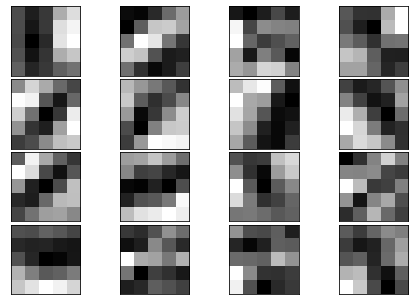

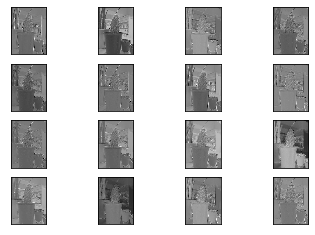

In [26]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from simple_convnet import SimpleConvNet
from matplotlib.image import imread
from common.layers import Convolution

def filter_show(filters, nx=4, show_num=16):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(show_num / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(show_num):
        ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')


network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

# 학습된 가중치
network.load_params("params.pkl")

filter_show(network.params['W1'], 16)

img = imread('../dataset/cactus_gray.png')
# print(img.shape)
img = img.reshape(1, 1, *img.shape)
# print(img.shape)
fig = plt.figure()

# w_idx = 1

# w = network.params['W1']
# b = network.params['b1']
# print(w.shape)
# print(b.shape)
# conv_layer = Convolution(w, b) 
# out = conv_layer.forward(img)
# print(out.shape)  # (1,30,329,246)

# print(network.params['W1'].shape)
for i in range(16):
    w = network.params['W1'][i]
    b = 0  # network.params['b1'][i]

    w = w.reshape(1, *w.shape)
    #b = b.reshape(1, *b.shape)
    conv_layer = Convolution(w, b) 
    out = conv_layer.forward(img)
#     print(out.shape)
    out = out.reshape(out.shape[2], out.shape[3])
    
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    ax.imshow(out, cmap=plt.cm.gray_r, interpolation='nearest')

plt.show()

In [27]:
import numpy as np
from simple_convnet import SimpleConvNet

network = SimpleConvNet(input_dim=(1,10, 10), 
                        conv_param = {'filter_num':10, 'filter_size':3, 'pad':0, 'stride':1},
                        hidden_size=10, output_size=10, weight_init_std=0.01)

X = np.random.rand(100).reshape((1, 1, 10, 10))
T = np.array([1]).reshape((1,1))

grad_num = network.numerical_gradient(X, T)
grad = network.gradient(X, T)

for key, val in grad_num.items():
    print(key, np.abs(grad_num[key] - grad[key]).mean())

W1 2.4583408094250953e-06
b1 9.944402090536e-06
W2 3.03092222176474e-11
b2 3.403126269717685e-09
W3 1.3375467001737899e-10
b3 1.7990608448398283e-07


In [28]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import pickle
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient


class SimpleConvNet:
    """단순한 합성곱 신경망
    
    conv - relu - pool - affine - relu - affine - softmax
    
    Parameters
    ----------
    input_size : 입력 크기（MNIST의 경우엔 784）
    hidden_size_list : 각 은닉층의 뉴런 수를 담은 리스트（e.g. [100, 100, 100]）
    output_size : 출력 크기（MNIST의 경우엔 10）
    activation : 활성화 함수 - 'relu' 혹은 'sigmoid'
    weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
        'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
        'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
    """
    def __init__(self, input_dim=(1, 28, 28), 
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """손실 함수를 구한다.

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        """
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        acc = 0.0
        
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt) 
        
        return acc / x.shape[0]

    def numerical_gradient(self, x, t):
        """기울기를 구한다（수치미분）.

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블

        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        loss_w = lambda w: self.loss(x, t)

        grads = {}
        for idx in (1, 2, 3):
            grads['W' + str(idx)] = numerical_gradient(loss_w, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_w, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """기울기를 구한다(오차역전파법).

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블

        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads
        
    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]

In [29]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)
print(x_train.shape)
print(t_train.shape)

(60000, 1, 28, 28)
(60000,)


train loss:2.2993107428283848
=== epoch:1, train acc:0.183, test acc:0.2 ===
train loss:2.2962557975715523
train loss:2.2924955903408075
train loss:2.2821046536663956
train loss:2.2735330869858075
train loss:2.2589001121261107
train loss:2.247119318676228
train loss:2.223542196848551
train loss:2.2007178127393217
train loss:2.2094438104198733
train loss:2.1324053798045157
train loss:2.0466980149177134
train loss:2.09692227326444
train loss:2.0398878896320496
train loss:1.9804092763575278
train loss:1.8590829085145415
train loss:1.8411445691237334
train loss:1.770614003360236
train loss:1.663253759011732
train loss:1.6290264968741694
train loss:1.4810558500231032
train loss:1.4644037784942807
train loss:1.3519406216675494
train loss:1.2805724725666223
train loss:1.1248578768141215
train loss:0.9852039325557879
train loss:1.1051129220290397
train loss:0.9013668465581
train loss:0.9478488180909669
train loss:0.9963721395705681
train loss:0.8491088076976325
train loss:0.8065133996552428
tr

train loss:0.12167526632085228
train loss:0.09708945490503755
train loss:0.15225041067961628
train loss:0.24594047729077892
train loss:0.18941861658859221
train loss:0.1757742545134989
train loss:0.08650813200565091
train loss:0.1581206940022254
train loss:0.11870314282456995
train loss:0.11696313986996326
train loss:0.19428821989603384
train loss:0.1696005986558038
train loss:0.14226438046706036
train loss:0.2072673107839699
train loss:0.3247755426042041
train loss:0.0529499274114497
train loss:0.24625828525547322
train loss:0.14182216348858598
train loss:0.17043631442061716
train loss:0.12582635309450696
train loss:0.1706247949488301
train loss:0.08403343184161306
train loss:0.19594042419645008
train loss:0.19341703554908274
train loss:0.1675224636390646
train loss:0.1436385187903121
train loss:0.11049878010772658
train loss:0.1839847760687805
train loss:0.16924901770027098
train loss:0.09603663583947451
train loss:0.17127358302569065
train loss:0.10988225196148506
train loss:0.14249

train loss:0.07740238671030951
train loss:0.08219191146952926
train loss:0.07103280327942212
train loss:0.033468405494032044
train loss:0.06161188174265476
train loss:0.07451034132365045
train loss:0.1460401356995382
train loss:0.031239671849305983
train loss:0.049021816738404084
train loss:0.07362877815195307
train loss:0.13910900051157113
train loss:0.05378290825535034
train loss:0.07293331795153624
train loss:0.044781983003415314
train loss:0.049080297809524824
train loss:0.06767115854173915
train loss:0.1162005541965406
train loss:0.0720930741883989
train loss:0.10934559337368156
train loss:0.04777239566324501
train loss:0.04089774526291021
train loss:0.11892013596579222
train loss:0.061012079733090994
train loss:0.04385209913082707
train loss:0.025063112791898975
train loss:0.13599920354119255
train loss:0.028447281788456343
train loss:0.04636696877040893
train loss:0.07660909702316383
train loss:0.047664429198647565
train loss:0.05129238912403178
=== epoch:12, train acc:0.965, te

train loss:0.05469377156069127
train loss:0.056711140676153814
train loss:0.07892852585175895
train loss:0.04414952136441741
train loss:0.04019473710882059
train loss:0.03734135317456622
train loss:0.021750549331470186
train loss:0.06659434006590224
train loss:0.04313271710044288
train loss:0.030989779150937244
train loss:0.045858843085016004
train loss:0.14092820575717904
train loss:0.03971041708001322
train loss:0.011756362204696431
train loss:0.03602098748228584
train loss:0.014174878292103342
train loss:0.06285222769744495
train loss:0.0582197527159278
train loss:0.04989231233708598
train loss:0.051118296150067716
train loss:0.03209283865210139
train loss:0.09645843531136297
train loss:0.03950847781422708
train loss:0.03489267650678636
train loss:0.024441049657332084
=== epoch:17, train acc:0.986, test acc:0.957 ===
train loss:0.034756017585729215
train loss:0.026660999160820417
train loss:0.031083680801987867
train loss:0.028900843288929154
train loss:0.044656899826244344
train lo

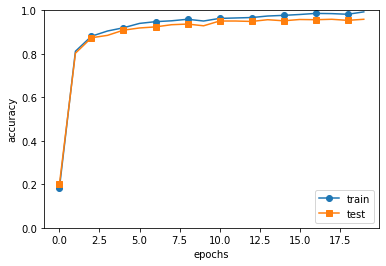

In [30]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)


# 시간이 오래 걸릴 경우 데이터를 줄인다.
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

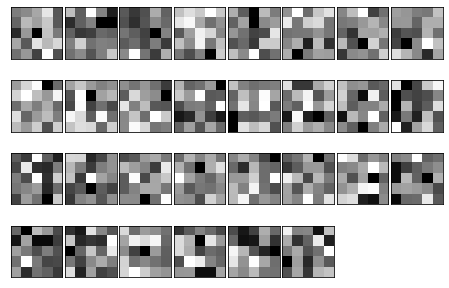

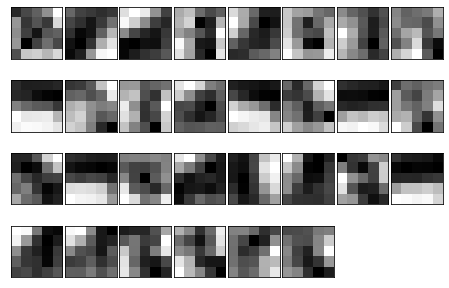

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from simple_convnet import SimpleConvNet

def filter_show(filters, nx=8, margin=3, scale=10):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()


network = SimpleConvNet()
# 무작위(랜덤) 초기화 후의 가중치
filter_show(network.params['W1'])

# 학습된 가중치
network.load_params("params.pkl")
filter_show(network.params['W1'])